In [1]:
!pip install simdkalman

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pykalman import KalmanFilter
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
kipas = pd.read_csv('kipasw.csv', index_col=0)
kipas.index = pd.to_datetime(kipas.index)
lampu = pd.read_csv('lampuw.csv', index_col=0)
lampu.index = pd.to_datetime(lampu.index)
lampu = lampu.drop_duplicates()
charger = pd.read_csv('chargerhpw.csv', index_col=0)
charger.index = pd.to_datetime(charger.index)
charger = charger.drop_duplicates()
laptop = pd.read_csv('chargerlpw.csv', index_col=0)
laptop.index = pd.to_datetime(laptop.index)
laptop = laptop.drop_duplicates()

In [4]:
# Mengambil data dari tanggal 20 Feb 2021 - 23 Apr 2021
kipas = kipas.loc['2021-02-20':'2021-04-23']
lampu = lampu.loc['2021-02-20':'2021-04-23']
laptop = laptop.loc['2021-02-20':'2021-04-23']
charger = charger.loc['2021-02-20':'2021-04-23']

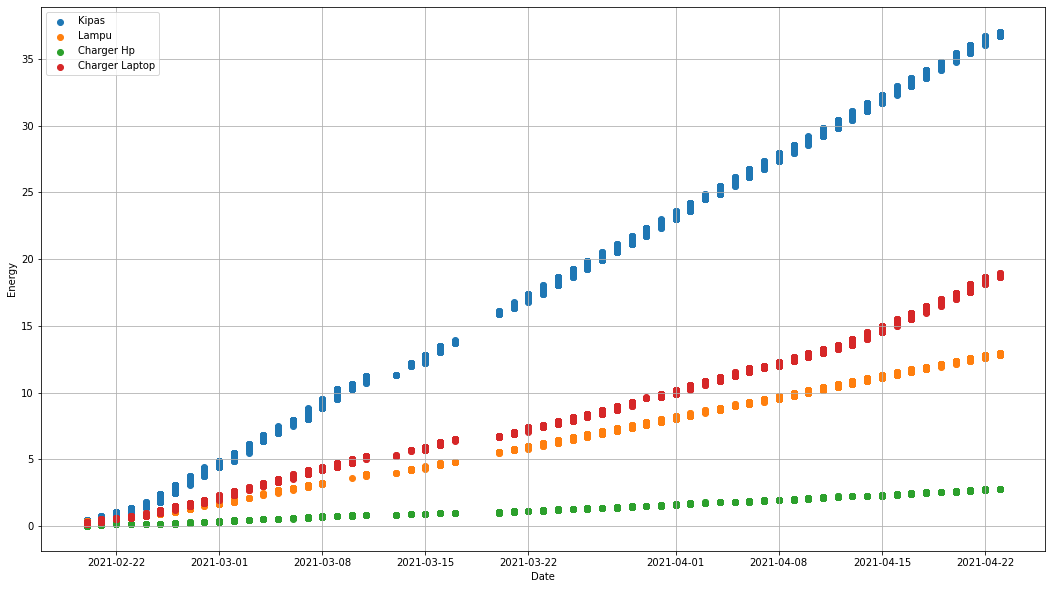

In [5]:
plt.figure(figsize=(18, 10))
plt.scatter(kipas.index, kipas.energy, label='Kipas')
plt.scatter(lampu.index, lampu.energy, label='Lampu')
plt.scatter(charger.index, charger.energy, label='Charger Hp')
plt.scatter(laptop.index, laptop.energy, label='Charger Laptop')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.grid()
plt.legend();

In [8]:
#Defining MAPE function
def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

### Linear Regression

In [9]:
def linear_regression(df):
    # Transform date into ordinal data
    df['date'] = pd.to_datetime(df.index)
    df['date'] = df['date'].map(dt.datetime.toordinal)
    data = df[['date', 'power', 'powerfactor', 'energy']]
    X = data[['date', 'power', 'powerfactor']]
    y = data.energy
    shape = int(np.ceil(len(data)*0.8))
    train_data = data.iloc[:shape, :]
    test_data = data.iloc[shape:, :]
    X_train = train_data[['date', 'power', 'powerfactor']]
    X_test = test_data[['date', 'power', 'powerfactor']]
    y_train = train_data.energy
    y_test = test_data.energy

    # Linear Regression model
    model = LinearRegression()
    model = model.fit(X_train, y_train)
    # Estimate energy from Linear Regression
    pred = model.predict(X)
    linreg_pred = model.predict(X_test)
    linreg_est = model.predict(X_train)
    # Evalution of Linear Regression Estimation data_TRAIN
    rmse_lr = np.sqrt(mean_squared_error(y_train, linreg_est)) # Root Mean Squared Error (Semakin kecil semakin baik)
    mse_lr = mean_squared_error(y_train, linreg_est) # Mean Squared Error (Semakin kecil semakin baik)
    mape_lr = mape(y_train, linreg_est) # Mean Absolute Percentage Error (Semakin kecil semakin baik)

    print('Linear Regression Evaluation')
    print("Train Data_____________________")
    print("RMSE: {}".format(rmse_lr))
    print("MSE: {}".format(mse_lr))
    print("MAPE {}".format(mape_lr))

    # Evalution of Linear Regression Estimation data_TEST
    rmse_lr_t = np.sqrt(mean_squared_error(y_test, linreg_pred)) # Root Mean Squared Error (Semakin kecil semakin baik)
    mse_lr_t = mean_squared_error(y_test, linreg_pred) # Mean Squared Error (Semakin kecil semakin baik)
    mape_lr_t = mape(y_test, linreg_pred) # Mean Absolute Percentage Error (Semakin kecil semakin baik)

    print("Test Data______________________")
    print("RMSE: {}".format(rmse_lr_t))
    print("MSE: {}".format(mse_lr_t))
    #print("R2: {}".format(r2_lr_t))
    print("MAPE {}".format(mape_lr_t))
    
    #Procceess generate data Random
    mu_power = df.power.mean()
    sigma_power = df.power.std()
    random_power = np.random.normal(mu_power, sigma_power, 60)
    mu_powerfactor = df.powerfactor.mean()
    sigma_powerfactor = df.powerfactor.std()
    random_powerfactor = np.random.normal(mu_powerfactor, sigma_powerfactor, 60)
    tidx = pd.date_range('2021-04-23', periods=60, freq='D') 
    val = pd.DataFrame(index=tidx)
    val['date'] = pd.to_datetime(val.index)
    val['date'] = val['date'].map(dt.datetime.toordinal)
    val['power'] = random_power
    val['powerfactor'] = random_powerfactor
    val['energy'] = model.predict(val)

    plt.figure(figsize=(18,8))
    #plt.plot(data.index, data.energy, 'o--', color='grey', alpha=0.3 , label="data")
    plt.scatter(X_train.index, y_train, s=5, color='blue', label='Train Data')
    plt.scatter(X_test.index, y_test, s=5, color='red', label='Test Data')
    plt.plot(X.index, pred,'k-', label='Linear Regression')
    plt.plot(val.index, val.energy, 'g-', label='Predicted', markersize=10)
    #for x,y in zip(val.index,val.energy):

    #    label = "{:.2f}".format(y)

    #    plt.annotate(label, # this is the text
    #                 (x,y), # this is the point to label
    #                 textcoords="offset points", # how to position the text
    #                 xytext=(0,10), # distance from text to points (x,y)
    #                 ha='center') 
    
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Energy')
    plt.legend()
    plt.show()
    #val = val[['energy']]
    #return val

Linear Regression Evaluation
Train Data_____________________
RMSE: 0.2775580263931318
MSE: 0.07703845801525046
MAPE 8.298917137202535
Test Data______________________
RMSE: 0.32305023898113683
MSE: 0.10436145690576963
MAPE 0.80302304115223


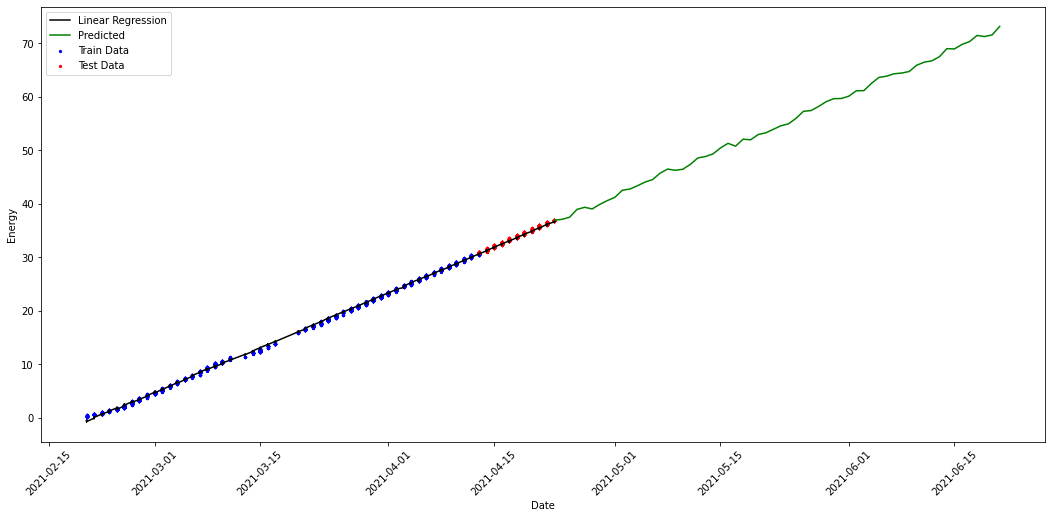

In [10]:
kipas_lr = linear_regression(kipas)
kipas_lr

Linear Regression Evaluation
Train Data_____________________
RMSE: 0.1293713791315885
MSE: 0.01673695373840921
MAPE 6.075895617266959
Test Data______________________
RMSE: 0.1895523830553595
MSE: 0.035930105921965744
MAPE 1.420152485612071


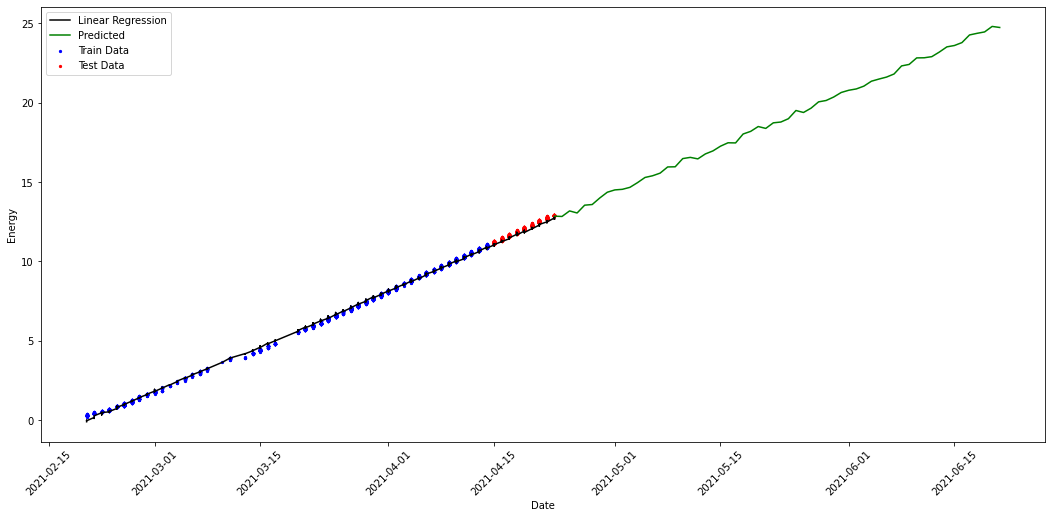

In [11]:
lampu_lr = linear_regression(lampu)
lampu_lr

Linear Regression Evaluation
Train Data_____________________
RMSE: 0.24866634044353067
MSE: 0.0618349488695779
MAPE 7.274931399941162
Test Data______________________
RMSE: 1.6753339710905486
MSE: 2.8067439146900273
MAPE 8.94537339524966


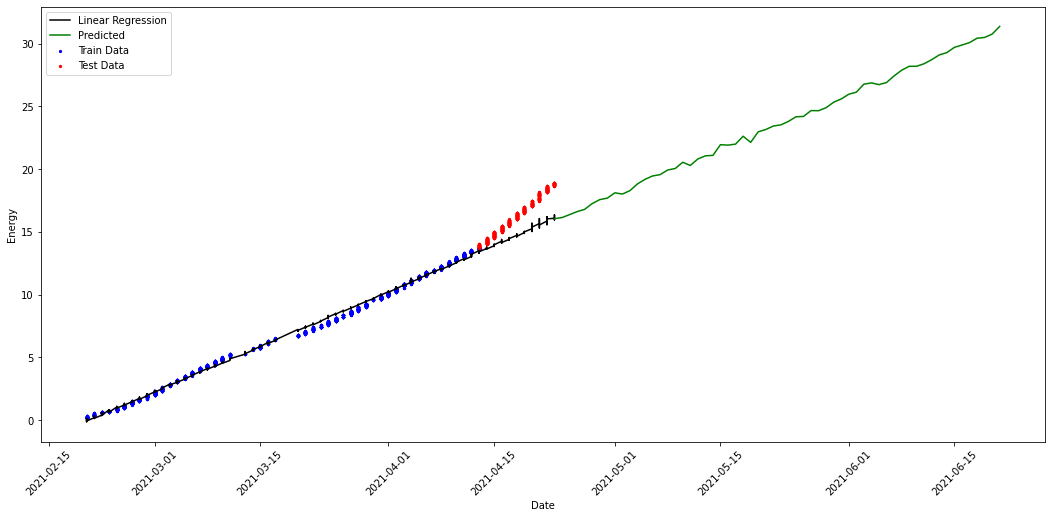

In [12]:
laptop_lr = linear_regression(laptop)
laptop_lr

Linear Regression Evaluation
Train Data_____________________
RMSE: 0.057988943625462884
MSE: 0.0033627175827971125
MAPE inf
Test Data______________________
RMSE: 0.18108089036141978
MSE: 0.03279028885408453
MAPE 6.85581526235752


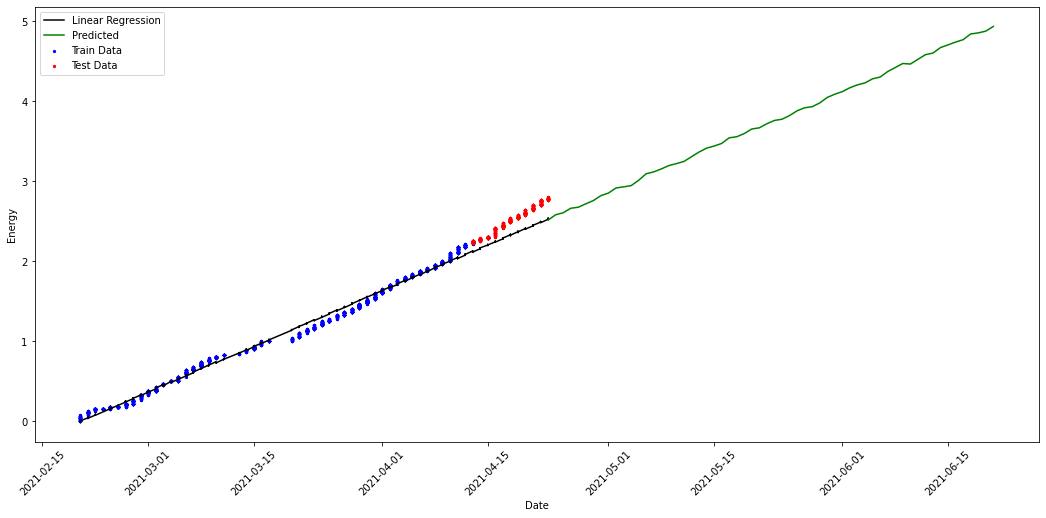

In [13]:
charger_lr = linear_regression(charger)
charger_lr

### Kalman Filter

In [32]:
def kalman_filter(df):
    """
    https://github.com/oseiskar/simdkalman/blob/master/doc/example.png
    """
    import simdkalman

    df['ds'] = df.index
    df = df.groupby('ds',as_index=False).mean()
    end = df.iloc[-1,0].date().strftime('%Y-%m-%d')
    df.index = df.ds
    data = df[['energy']]

    shape = int(np.ceil(len(data)*0.8))
    train_data = data.iloc[:shape, :]
    y_train = train_data.energy.values
    test_data = data.iloc[shape:, :]
    y_test = test_data.energy.values

    # xk=Axk−1+qk−1,qk−1∼N(0,Q) | x = hidden state
    # yk=Hxk+rk,rk∼N(0,R), | y = observation
    kf = simdkalman.KalmanFilter(
        state_transition = np.array([[1,1],[0,1]]), #transisi Matriks A
        process_noise = np.diag([0.1, 0.01]), # proses noise Q
        observation_model = np.array([[1,0]]), # measure and observ model H
        observation_noise = 1.0) # measure and observ noise covariant R

    obs = np.reshape(train_data.energy.values, (1, len(train_data)))

    kf = kf.em(obs, n_iter=10)

    smoothed = kf.smooth(obs)

    test_shape = int(len(test_data))

    pred = kf.predict(obs, test_shape+60)

    kf_pred = pred.observations.mean[0,:test_shape]
    val_pred = pred.observations.mean[0,test_shape:]
    kf_est = smoothed.observations.mean[0,:]

    # Evalution of Kalman Filter Estimation data_TRAIN
    rmse_kf = np.sqrt(mean_squared_error(y_train, kf_est)) # Root Mean Squared Error (Semakin kecil semakin baik)
    mse_kf = mean_squared_error(y_train, kf_est) # Mean Squared Error (Semakin kecil semakin baik)
    mape_kf = mape(y_train, kf_est) # Mean Absolute Percentage Error (Semakin kecil semakin baik)

    print('Kalman Filter Evaluation')
    print("Train Data_____________________")
    print("RMSE: {}".format(rmse_kf))
    print("MSE: {}".format(mse_kf))
    print("MAPE {}".format(mape_kf))

    # Evalution of Kalman Filter Estimation data_TEST
    rmse_kf_t = np.sqrt(mean_squared_error(y_test, kf_pred)) # Root Mean Squared Error (Semakin kecil semakin baik)
    mse_kf_t = mean_squared_error(y_test, kf_pred) # Mean Squared Error (Semakin kecil semakin baik)
    mape_kf_t = mape(y_test, kf_pred) # Mean Absolute Percentage Error (Semakin kecil semakin baik)

    print("Test Data______________________")
    print("RMSE: {}".format(rmse_kf_t))
    print("MSE: {}".format(mse_kf_t))
    print("MAPE {}".format(mape_kf_t))


    tidx = pd.date_range(end, periods=60, freq='D') 
    val_df = pd.DataFrame(val_pred, columns=['energy'], index=tidx)

    plt.figure(figsize=(18,8))
    # plt.plot(data.index, data.energy, 'b.', label="data")
    plt.plot(train_data.index, y_train, 'b.', label='Train Data')
    plt.plot(test_data.index, y_test, 'r.', label='Test Data')
    smoothed_obs = smoothed.observations.mean[0,:]
    plt.plot(train_data.index, smoothed_obs, 'k-', label="Kalman Filter")
    x_pred = np.arange(data.shape[1], data.shape[1]+pred.observations.mean.shape[1])
    y_pred = pred.observations.mean[0,:]
    #plt.plot(test_data.index, kf_pred, 'k-')
    plt.plot(val_df.index, val_df.energy, 'bo-', label='Predicted')
    #for x,y in zip(val_df.index,val_df.energy):

    #    label = "{:.2f}".format(y)

    #    plt.annotate(label, # this is the text
    #                 (x,y), # this is the point to label
    #                 textcoords="offset points", # how to position the text
    #                 xytext=(0,10), # distance from text to points (x,y)
    #                 ha='center') 
    plt.legend()

    plt.show()
    return val_df

Kalman Filter Evaluation
Train Data_____________________
RMSE: 0.07794787192169815
MSE: 0.006075870737121458
MAPE 0.78952239593381
Test Data______________________
RMSE: 0.07687671821537029
MSE: 0.005910029803565447
MAPE 0.20205060607445866


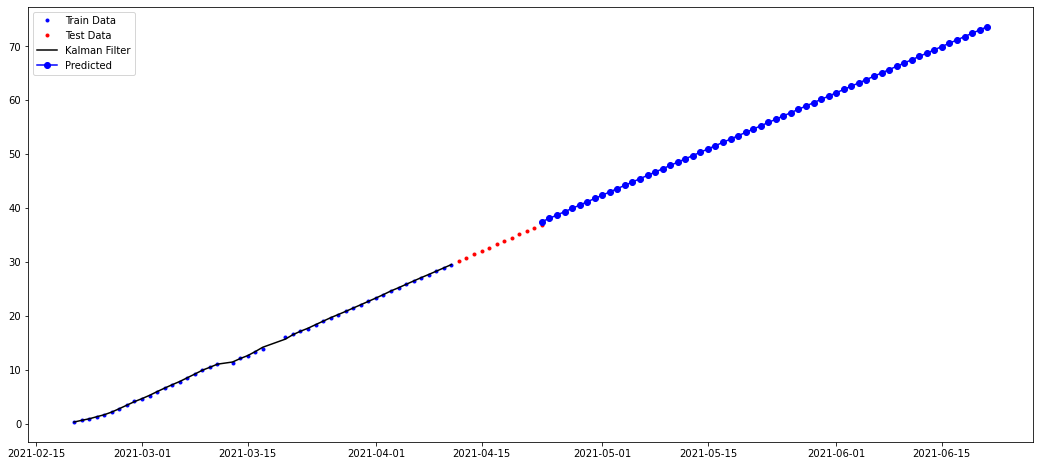

,energy
2021-04-23,37.463482
2021-04-24,38.076556
2021-04-25,38.689631
2021-04-26,39.302706
2021-04-27,39.915781
2021-04-28,40.528855
2021-04-29,41.141930
2021-04-30,41.755005
2021-05-01,42.368079
2021-05-02,42.981154


In [33]:
kipas_kf = kalman_filter(kipas)
kipas_kf

Kalman Filter Evaluation
Train Data_____________________
RMSE: 0.019310881367804122
MSE: 0.0003729101392014044
MAPE 0.4038134176539054
Test Data______________________
RMSE: 1.064619032976175
MSE: 1.133413685375126
MAPE 4.978659093883351


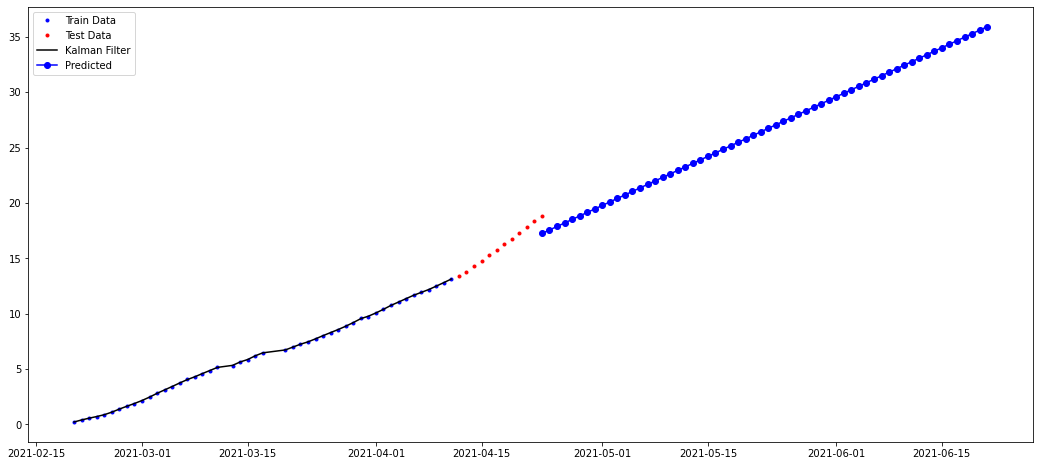

,energy
2021-04-23,17.242216
2021-04-24,17.558671
2021-04-25,17.875126
2021-04-26,18.191581
2021-04-27,18.508035
2021-04-28,18.824490
2021-04-29,19.140945
2021-04-30,19.457400
2021-05-01,19.773855
2021-05-02,20.090309


In [23]:
laptop_kf = kalman_filter(laptop)
laptop_kf

Kalman Filter Evaluation
Train Data_____________________
RMSE: 0.004091997501477864
MSE: 1.674444355210108e-05
MAPE 1.0591116177566506
Test Data______________________
RMSE: 0.175947658812535
MSE: 0.030957578641612225
MAPE 6.254036536906474


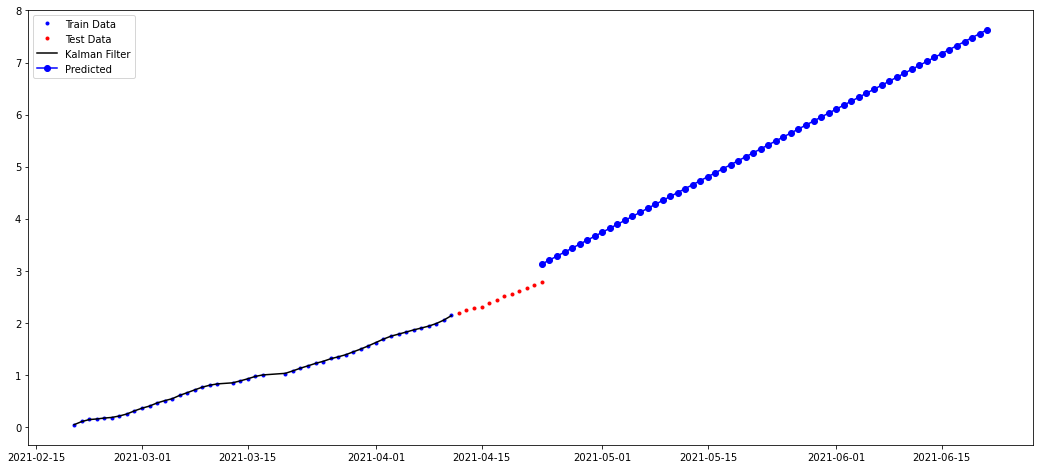

,energy
2021-04-23,3.130394
2021-04-24,3.206673
2021-04-25,3.282953
2021-04-26,3.359232
2021-04-27,3.435512
2021-04-28,3.511792
2021-04-29,3.588071
2021-04-30,3.664351
2021-05-01,3.740630
2021-05-02,3.816910


In [24]:
charger_kf = kalman_filter(charger)
charger_kf

Kalman Filter Evaluation
Train Data_____________________
RMSE: 0.025064091019079332
MSE: 0.0006282086586126932
MAPE 0.4635543695381176
Test Data______________________
RMSE: 0.05875008035950473
MSE: 0.003451571942248263
MAPE 0.412944259291807


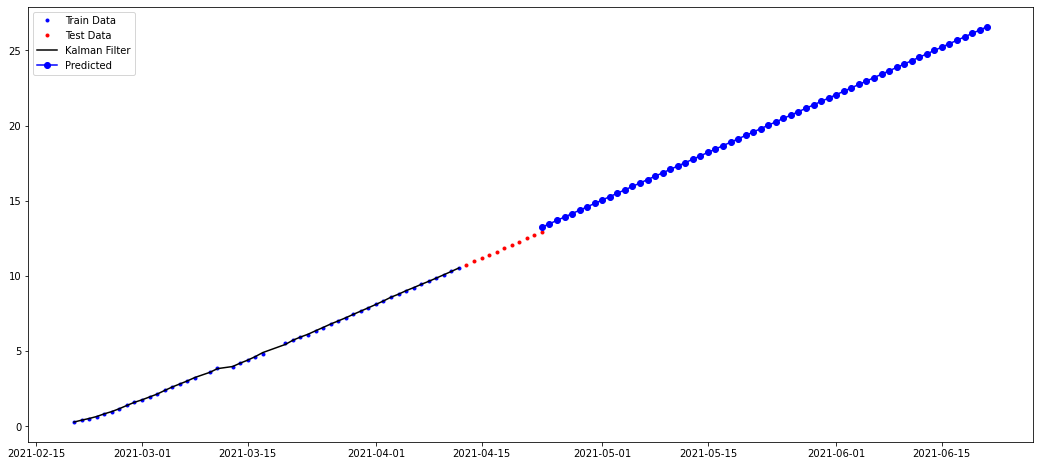

,energy
2021-04-23,13.245066
2021-04-24,13.471025
2021-04-25,13.696984
2021-04-26,13.922944
2021-04-27,14.148903
2021-04-28,14.374862
2021-04-29,14.600821
2021-04-30,14.826780
2021-05-01,15.052740
2021-05-02,15.278699


In [25]:
lampu_kf = kalman_filter(lampu)
lampu_kf

In [40]:
def plot_gabung(df):
    import simdkalman
    # Transform date into ordinal data
    df['date'] = pd.to_datetime(df.index)
    df['date'] = df['date'].map(dt.datetime.toordinal)
    
    data = df[['date', 'power', 'powerfactor', 'energy']]
    #sns.pairplot(data)
    
    X_lr = data[['date', 'power', 'powerfactor']]
    
    y_lr = data.energy
    
    shape = int(np.ceil(len(data)*0.8))
    
    train_data_lr = data.iloc[:shape, :]
    test_data_lr = data.iloc[shape:, :]
    
    X_train_lr = train_data_lr[['date', 'power', 'powerfactor']]
    X_test_lr = test_data_lr[['date', 'power', 'powerfactor']]
    
    y_train_lr = train_data_lr.energy
    y_test_lr = test_data_lr.energy

    # Linear Regression model
    model_lr = LinearRegression()
    model_lr = model_lr.fit(X_train_lr, y_train_lr)
    
    # Estimate energy from Linear Regression
    pred_lr = model_lr.predict(X_lr)
    a = pd.DataFrame()
    a['actual'] = y_lr
    a['predict'] = pred_lr
    linreg_pred = model_lr.predict(X_test_lr)
    linreg_est = model_lr.predict(X_train_lr)
    
    mu_power = df.power.mean()
    sigma_power = df.power.std()
    random_power = np.random.normal(mu_power, sigma_power, 60)
    
    mu_powerfactor = df.powerfactor.mean()
    sigma_powerfactor = df.powerfactor.std()
    random_powerfactor = np.random.normal(mu_powerfactor, sigma_powerfactor, 60)
    
    tidx = pd.date_range('2021-04-23', periods=60, freq='D') 
    
    val = pd.DataFrame(index=tidx)
    val['date'] = pd.to_datetime(val.index)
    val['date'] = val['date'].map(dt.datetime.toordinal)
    val['power'] = random_power
    val['powerfactor'] = random_powerfactor
    val['energy'] = model_lr.predict(val)

    df['ds'] = df.index
    df = df.groupby('ds',as_index=False).mean()
    
    end = df.iloc[-1,0].date().strftime('%Y-%m-%d')
    
    df.index = df.ds
    data = df[['energy']]

    shape = int(np.ceil(len(data)*0.8))
    
    train_data = data.iloc[:shape, :]
    y_train_kf = train_data.energy.values
    
    test_data = data.iloc[shape:, :]
    y_test_kf = test_data.energy.values

    kf = simdkalman.KalmanFilter(
        state_transition = np.array([[1,1],[0,1]]),
        process_noise = np.diag([0.1, 0.01]),
        observation_model = np.array([[1,0]]),
        observation_noise = 1.0)

    obs = np.reshape(train_data.energy.values, (1, len(train_data)))

    kf = kf.em(obs, n_iter=10)

    smoothed = kf.smooth(obs)

    test_shape = int(len(test_data))

    pred = kf.predict(obs, test_shape+60)

    kf_pred = pred.observations.mean[0,:test_shape]
    val_pred = pred.observations.mean[0,test_shape:]
    kf_est = smoothed.observations.mean[0,:]

    tidx = pd.date_range(end, periods=60, freq='D') 
    val_df = pd.DataFrame(val_pred, columns=['energy'], index=tidx)

    plt.figure(figsize=(5,5))
    plt.plot(data.index, data.energy, 'k-', label="Actual Data")
    #plt.plot(data.index, data.energy,color= "black", label="Actual Data")
    #plt.plot(test_data.index, y_test_kf, 'r.', label='Test Data')
    smoothed_obs = smoothed.observations.mean[0,:]
    plt.plot(test_data.index, kf_pred, color= "orange")
    
    plt.plot(train_data.index, smoothed_obs, color= "orange", label="Kalman Filter")
    x_pred_kf = np.arange(data.shape[1], data.shape[1]+pred.observations.mean.shape[1])
    y_pred_kf = pred.observations.mean[0,:]
    #plt.plot(val_df.index, val_df.energy, color= "red" , label='Prediksi KF 2 Bulan Kedepan')
    plt.plot(X_lr.index, pred_lr,color= "blue", label='Linear Regression')
    #plt.plot(val.index, val.energy, color= "salmon", label='Prediksi LR 2 Bulan Kedepan')
    
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Energy')
    plt.legend()
    plt.show()

    return

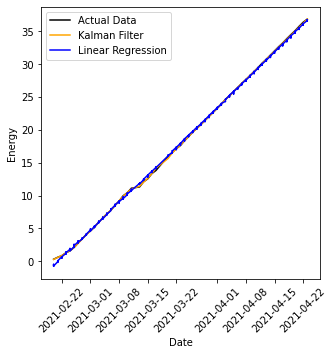

In [41]:
plot_gabung(kipas)

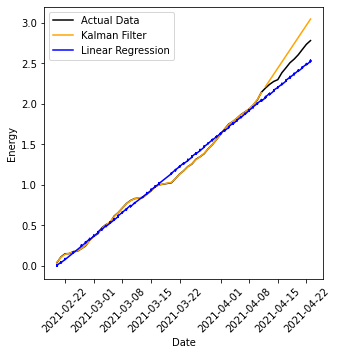

In [25]:
plot_gabung(charger)

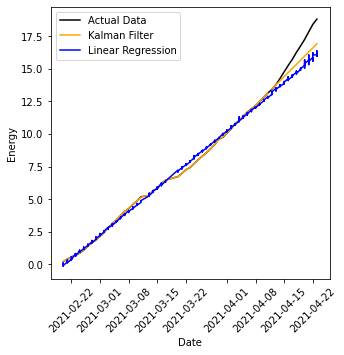

In [26]:
plot_gabung(laptop)

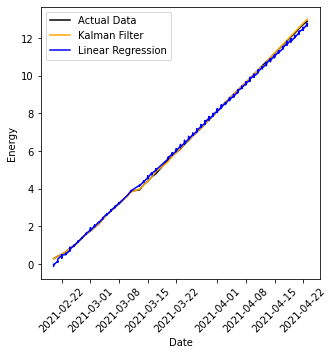

In [27]:
plot_gabung(lampu)